In [1]:
import boto3
import json
import os.path
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

session = boto3.Session()

/home/ubuntu/anaconda3/envs/mxnet_p36/lib/python3.6/site-packages/matplotlib/font_manager.py:278: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [8]:
BUCKET = "deeplens-dbs-mot-faces-dataset"
s3 = session.resource('s3')
bucket = s3.Bucket(BUCKET)

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[ 66,  40,  15],
        [ 66,  40,  15],
        [ 66,  42,  16],
        ...,
        [108,  65,  22],
        [105,  62,  19],
        [104,  61,  18]],

       [[ 65,  39,  14],
        [ 66,  40,  15],
        [ 66,  42,  16],
        ...,
        [110,  67,  24],
        [107,  64,  19],
        [105,  62,  17]],

       [[ 66,  38,  14],
        [ 66,  40,  15],
        [ 67,  41,  16],
        ...,
        [112,  68,  23],
        [108,  64,  19],
        [106,  62,  17]]

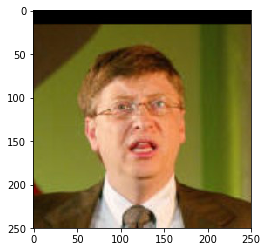

In [9]:
img=mpimg.imread('data/flw-raw/Bill_Gates_0001.jpg')
display(img)
plt.imshow(img)

In [20]:
def detect_faces(bucket, key, region="us-east-1"):
    try:
        rekognition = session.client("rekognition", region)
        response = rekognition.detect_faces(
            Image={
                "S3Object": {
                    "Bucket": bucket,
                    "Name": key,
                }
            },
            Attributes=[
                'ALL',
            ]
        )
        return response['FaceDetails']
    
    except Exception as e:
        print(key+':'+str(e))

In [21]:
idx = 0

def process_obj(obj):
    global idx
    idx = idx+1
    key = obj.key
    filename = key.split('.')[0]
    fname = "data/flw-responses/{}.json".format(filename)
    
    if os.path.isfile(fname):
        print(key, " Processed")
    else:
        print(idx, ' - ', key)
        for response in detect_faces(BUCKET, key):
            filename = key.split('.')[0]
            with open(fname, 'w') as outfile:
                json.dump(response, outfile)

In [24]:
my_array= bucket.objects.filter()
    
from multiprocessing.dummy import Pool as ThreadPool 
pool = ThreadPool(10)
results = pool.map(process_obj, my_array)

Akbar_Hashemi_Rafsanjani_0003.jpg  Processed
Amelie_Mauresmo_0015.jpg  Processed
Amelie_Mauresmo_0016.jpg  Processed
Amelie_Mauresmo_0017.jpg  Processed
Amelie_Mauresmo_0018.jpg  Processed
Amelie_Mauresmo_0019.jpg  Processed
Amelie_Mauresmo_0020.jpg  Processed
Ari_Fleischer_0010.jpg  Processed
Ari_Fleischer_0011.jpg  ProcessedAkhmed_Zakayev_0001.jpg  Processed
Akhmed_Zakayev_0002.jpg  Processed
Akiko_Morigami_0001.jpg  Processed
Akmal_Taher_0001.jpg  Processed
Al_Cardenas_0001.jpg  Processed
Benazir_Bhutto_0001.jpg  Processed
Benazir_Bhutto_0002.jpg  Processed
Benazir_Bhutto_0003.jpg  Processed
Benazir_Bhutto_0004.jpg  ProcessedAmelie_Mauresmo_0021.jpg  Processed
Amer_al-Saadi_0001.jpg  Processed
Amer_al-Saadi_0002.jpg  Processed
Amer_al-Saadi_0003.jpg  Processed

Ari_Fleischer_0012.jpg Al_Davis_0001.jpg  ProcessedBrad_Brownell_0001.jpg  Processed
Brad_Garrett_0001.jpg  Processed
Ari_Fleischer_0013.jpg  Processed
Arianna_Huffington_0001.jpg  Processed
Arianna_Huffington_0002.jpg  Proce

Brook_Robinson_0001.jpg  Processed
Doug_Christie_0001.jpg  Processed
Doug_Collins_0001.jpg Andrea_Kiser_0001.jpg  Processed
Andrea_Yates_0001.jpg  Processed Processed
Doug_Collins_0002.jpg  Processed
Doug_Duncan_0001.jpg Bill_Frist_0002.jpg  Processed
Bill_Frist_0003.jpg  ProcessedCharles_Richardson_0001.jpg  Processed
 Processed
 Processed
Dan_LaCoutre_0001.jpg  Processed
Derek_Lowe_0001.jpg  Processed
Derek_Lowe_0002.jpg  Processed
 Processed
Dan_Monson_0001.jpg  Processed
Dan_Morales_0001.jpg  Processed
Dan_Morales_0002.jpg  Processed
Dan_Morales_0003.jpg  Processed
Dan_Prinster_0001.jpg  Processed
Dan_Quayle_0001.jpg  Processed
Dan_Reeves_0001.jpg Charles_Rogers_0001.jpg  Processed
Charles_Schumer_0001.jpg  Processed
Charles_Schumer_0002.jpg  Processed
Charles_Tannok_0001.jpg  Processed
Charles_Taylor_0001.jpg  Processed
 Processed
Brooke_Adams_0001.jpg  Processed
Brooke_Gordon_0001.jpg  Processed
 Processed

Colin_Powell_0076.jpg  Processed

Andreas_Vinciguerra_0001.jpg  Processed

Carlos_Mesa_0001.jpg  Processed  Processed
Edward_Flynn_0001.jpg  Processed
Edward_Greenspan_0001.jpg  Processed
 Processed
Barry_Nakell_0001.jpg  Processed

Edward_James_Olmos_0001.jpg  Processed
Edward_James_Olmos_0002.jpg  Processed
Edward_Johnson_0001.jpg  Processed
Edward_Kennedy_0001.jpg  Processed
Edward_Kennedy_0002.jpg
Donald_Hays_0001.jpg  Processed
Donald_Keck_0001.jpg   Processed
Edward_Kennedy_0003.jpg  Processed
Edward_Lohn_0001.jpg  Processed Processed
Colin_Powell_0208.jpg  Processed
Colin_Powell_0209.jpg  Processed
Alvaro_Uribe_0030.jpg  ProcessedAnne_McLellan_0002.jpg  Processed
Anne_McLellan_0003.jpg Bob_Goldman_0001.jpg  Processed
Carlos_Mesa_0002.jpg  Processed
Donald_Keyser_0001.jpg  Processed
Donald_Pettit_0001.jpg  Processed
Donald_Pettit_0002.jpg  Processed
Donald_Pettit_0003.jpg  Processed
Donald_Regan_0001.jpg  Processed
Donald_Rumsfeld_0001.jpg  Processed Processed
Carlos_Moya_0001.jpg  Processed
Alvaro_Uribe_0031.jpg  Processed
Colin_Powell_0210.jpg  Proces

Jennifer_Capriati_0010.jpg  Processed  Processed
Jim_Thome_0001.jpg  Processed
 Processed
Isabella_Rossellini_0003.jpg  Processed
Isabelle_Huppert_0001.jpg  Processed
Isabelle_Huppert_0002.jpg  Processed
Isaiah_Washington_0001.jpg  Processed
Heidi_Klum_0001.jpg  Processed
Heidi_Klum_0002.jpg  Processed
Heidi_Klum_0003.jpg  Processed
Heidi_Klum_0004.jpg  Processed
Heidi_Klum_0005.jpg  Processed
Heinrich_Wolfgang_0001.jpg  Processed
Jim_Tressel_0001.jpg  Processed
Jim_Tressel_0002.jpg  Processed

Isaiah_Washington_0002.jpg  Processed
Ishaq_Shahryar_0001.jpg  Processed
Ishaq_Shahryar_0002.jpg  Processed
Isidro_Pastor_0001.jpg  Processed
Islam_Karimov_0001.jpg  ProcessedJennifer_Capriati_0011.jpg  Processed
 Processed
Gerhard_Boekel_0001.jpg  Processed
Jennifer_Capriati_0012.jpg  Processed
Jennifer_Capriati_0013.jpg  Processed
Jennifer_Capriati_0014.jpg  Processed
Jennifer_Capriati_0015.jpg  Processed
Jennifer_Capriati_0016.jpg  Processed
Jennifer_Capriati_0017.jpg  Processed
Jennifer_Capr

Gerhard_Schroeder_0074.jpg  Processed
Gerhard_Schroeder_0075.jpg  Processed
Gerhard_Schroeder_0076.jpg   Processed
George_W_Bush_0304.jpg  Processed
George_W_Bush_0305.jpg  Processed
George_W_Bush_0306.jpg  Processed
George_W_Bush_0307.jpg  Processed
George_W_Bush_0308.jpg  Processed
George_W_Bush_0309.jpg  Processed
George_W_Bush_0310.jpg  Processed
George_W_Bush_0311.jpg  Processed
George_W_Bush_0312.jpg  Processed
George_W_Bush_0313.jpg  Processed
George_W_Bush_0314.jpg  Processed
Jack_Straw_0005.jpg  Processed
Jack_Straw_0006.jpg  Processed
Jack_Straw_0007.jpg  Processed
Jack_Straw_0008.jpg  Processed
Jack_Straw_0009.jpg  Processed
Jack_Straw_0010.jpg George_W_Bush_0315.jpg  Processed
George_W_Bush_0316.jpg  Processed
George_W_Bush_0317.jpg  Processed
George_W_Bush_0318.jpg  Processed
George_W_Bush_0319.jpg  Processed
George_W_Bush_0320.jpg  Processed
George_W_Bush_0321.jpg  Processed
Jennifer_Lopez_0016.jpg  Processed
Jennifer_Lopez_0017.jpg  Processed
Jennifer_Lopez_0018.jpg  Pro


Lindsay_Davenport_0014.jpg  Processed
Lindsay_Davenport_0015.jpg  Processed
Lindsay_Davenport_0016.jpg  Processed
Lindsay_Davenport_0017.jpg  Processed
Joseph_Estrada_0001.jpg  Processed
Joseph_Estrada_0002.jpg  ProcessedJean_Chretien_0032.jpg  Processed
Jean_Chretien_0033.jpg  Processed
Jean_Chretien_0034.jpg  Processed
Jean_Chretien_0035.jpg  Processed
Jean_Chretien_0036.jpg  Processed
Jean_Chretien_0037.jpg  Processed
Jean_Chretien_0038.jpg  Processed
Jean_Chretien_0039.jpg  Processed
Jean_Chretien_0040.jpg  Processed
Jean_Chretien_0041.jpg  Processed
Jean_Chretien_0042.jpg  Processed
Jean_Chretien_0043.jpg  Processed
Jean_Chretien_0044.jpg  Processed
Jean_Chretien_0045.jpg  Processed
Kate_Winslet_0001.jpg  Processed
Kate_Winslet_0002.jpg  Processed
Kate_Winslet_0003.jpg  Processed
Gore_Vidal_0001.jpg  Processed Processed
Mahendra_Chaudhry_0001.jpg  Processed
Mahima_Chaudhari_0001.jpg  Processed
Mahmoud_Abbas_0001.jpg  Processed
Joseph_Estrada_0003.jpg  Processed
Joseph_Estrada_000

Nancy_Demme_0002.jpg  Processed
Kelly_Clarkson_0003.jpg  Processed
Nancy_Greenlaw_0001.jpg  Processed
Nancy_Humbert_0001.jpg  Processed
  Processed
John_Paul_II_0005.jpg  Processed
John_Paul_II_0006.jpg  Processed
John_Paul_II_0007.jpg  Processed
Matthew_Broderick_0001.jpg  Processed
Kelly_Leigh_0001.jpg  Processed
Kelly_Osbourne_0001.jpg  Processed
Kelly_Ripa_0001.jpg  Processed
Kelly_Santos_0001.jpg  Processed
Kelsey_Grammer_0001.jpg  Processed
Kelvin_Sampson_0001.jpg  Processed
Kelvin_Sampson_0002.jpg  Processed
Matthew_Broderick_0002.jpg  Processed
Matthew_Broderick_0003.jpg  Processed
Matthew_Broderick_0004.jpg  Processed
Matthew_During_0001.jpg  Processed
Matthew_McConaughey_0001.jpg  ProcessedJohn_Paul_II_0008.jpg  Processed
John_Paul_II_0009.jpg  Processed
Nancy_Kerrigan_0001.jpg  Processed

Matthew_Ouimet_0001.jpg  ProcessedNancy_Pelosi_0001.jpg  Processed
Nancy_Pelosi_0002.jpg  Processed
Nancy_Pelosi_0003.jpg  Processed
Nancy_Pelosi_0004.jpg  Processed
Nancy_Pelosi_0005.jpg  

Mireya_Moscoso_0002.jpg   Processed
Nicholoas_DiMarzio_0001.jpg  Processed
Nick_Cassavetes_0001.jpg  Processed
Nick_Markakis_0001.jpg
Junichiro_Koizumi_0048.jpg Leonid_Kuchma_0004.jpg  Processed
Leonid_Kuchma_0005.jpg  Processed
Leonid_Kuchma_0006.jpg  Processed  ProcessedMichael_Jackson_0003.jpg  Processed

Lesia_Burlak_0001.jpg  Processed
Lesley_Coppin_0001.jpg  Processed
Lesley_Flood_0001.jpg  Processed
Lesley_McCulloch_0001.jpg  Processed
Lesley_McCulloch_0002.jpg  Processed
 Processed
Junichiro_Koizumi_0049.jpg  Processed
Junichiro_Koizumi_0050.jpg  Processed
Junichiro_Koizumi_0051.jpg  Processed
Junichiro_Koizumi_0052.jpg  Processed
Junichiro_Koizumi_0053.jpg  Processed
Junichiro_Koizumi_0054.jpg  Processed
Junichiro_Koizumi_0055.jpg  Processed
Junichiro_Koizumi_0056.jpg  Processed
Junichiro_Koizumi_0057.jpg  Processed
Junichiro_Koizumi_0058.jpg  Processed

Joschka_Fischer_0019.jpg  Processed
Jose_Acasuso_0001.jpg  Processed
Michael_Jackson_0004.jpg  Processed
Michael_Jackson_000

 Processed
Richard_Gere_0007.jpg  Processed
Richard_Gere_0008.jpg  ProcessedPaul_ONeill_0006.jpg  Processed
Paul_ONeill_0007.jpg  Processed
Paul_ONeill_0008.jpg  Processed
Paul_ONeill_0009.jpg  Processed
Paul_Otellini_0001.jpg  Processed
Richard_Gere_0009.jpg  Processed
Richard_Gere_0010.jpg  Processed
Richard_Greenberg_0001.jpg  Processed
Richard_Haass_0001.jpg  Processed
Richard_Haass_0002.jpg  Processed
Richard_Hamilton_0001.jpg  Processed
Richard_Harris_0001.jpg  Processed
Richard_Hellfant_0001.jpg  Processed
Richard_Jefferson_0001.jpg  Processed
Richard_Jewell_0001.jpg  Processed
Richard_Krajicek_0001.jpg  Processed

Noah_Wyle_0001.jpg Richard_Krajicek_0002.jpg  Processed
Richard_Krajicek_0003.jpg  Processed
Richard_Langille_0001.jpg  Processed
Richard_Lennon_0001.jpg  Processed
Richard_Levin_0001.jpg  Processed
Richard_Lugar_0001.jpg  Processed
Richard_Myers_0001.jpg  Processed
Pupi_Avati_0001.jpg  Processed
Pupi_Avati_0002.jpg  Processed
Pupi_Avati_0003.jpg  Processed
Pupi_Avati

Roy_Moore_0002.jpg  Processed
Roy_Moore_0003.jpg  Processed
Roy_Moore_0004.jpg  Processed
Roy_Moore_0005.jpg  Processed
Ray_Young_0001.jpg  Processed
Raymond_Arthurs_0001.jpg  Processed

Robert_Fico_0001.jpg  Processed
Robert_Fico_0002.jpg  Processed
Robert_Flodquist_0001.jpg  Processed
Robert_Gallo_0001.jpg  Processed
Robert_Gordon_Card_0001.jpg  Processed
Robert_Hanssen_0001.jpg  Processed
Robert_Horan_0001.jpg  Processed
Kim_Ryong-sung_0002.jpg  Processed
Pete_Sampras_0011.jpg  Processed
Pete_Sampras_0012.jpg  ProcessedRaymond_Odierno_0001.jpg  Processed
Raymond_Odierno_0002.jpg  Processed
Raza_Rabbani_0001.jpg  Processed
Razali_Ismail_0001.jpg  Processed
Rebecca_Romijn-Stamos_0001.jpg  Processed
Rebecca_Romijn-Stamos_0002.jpg  Processed
  Processed
Pat_Cox_0001.jpg  ProcessedRoy_Moore_0006.jpg  Processed

Pat_Cox_0002.jpg  Processed
Pat_DAmuro_0001.jpg  Processed
Pat_Riley_0001.jpg  Processed
Pat_Rochester_0001.jpg  Processed
Pat_Summerall_0001.jpg 
Steve_Mariucci_0002.jpg  Process

Thomas_Van_Essen_0001.jpg  Processed
Thomas_Watjen_0001.jpg  Processed
George_W_Bush_0089.jpg  Processed
Thomas_Weston_0001.jpg  Processed
Thomas_Wilkens_0001.jpg  Processed
Thomas_Wyman_0001.jpg  Processed
Thomas_Wyman_0002.jpg  Processed
Thor_Pedersen_0001.jpg  Processed
Tia_Mowry_0001.jpg  ProcessedGeorge_W_Bush_0090.jpg  Processed
George_W_Bush_0091.jpg  Processed
George_W_Bush_0092.jpg 
 Processed
George_W_Bush_0093.jpg  Processed
Tiago_Splitter_0001.jpg  ProcessedGeorge_W_Bush_0094.jpg  Processed
George_W_Bush_0095.jpg  Processed
George_W_Bush_0096.jpg  Processed

Tian_Liang_0001.jpg  Processed
Tian_Zhuang_Zhuang_0001.jpg  Processed
Tiffany_Limos_0001.jpg  Processed
George_W_Bush_0097.jpg  Processed
Tiger_Woods_0001.jpg  Processed
Tiger_Woods_0002.jpg  Processed
Tiger_Woods_0003.jpg  Processed
George_W_Bush_0098.jpg  Processed
Tiger_Woods_0004.jpg  Processed
Tiger_Woods_0005.jpg  Processed
Tiger_Woods_0006.jpg  Processed
George_W_Bush_0099.jpg  Processed
George_W_Bush_0100.jpg  P

Mark_Lazarus_0001.jpg  Processed
Tony_Blair_0139.jpg  Processed
Tony_Blair_0140.jpg  Processed
Tony_Blair_0141.jpg  Processed
Mark_Leno_0001.jpg  Processed
Mark_Mariscal_0001.jpg  Processed
Tony_Blair_0142.jpg  Processed
Tony_Blair_0143.jpg  Processed
Tony_Blair_0144.jpg  Processed
Mark_Martin_0001.jpg  Processed
Mark_McClellan_0001.jpg  ProcessedTony_Clement_0001.jpg  Processed
Mark_Mishkin_0001.jpg  Processed
Mark_Mulder_0001.jpg  Processed
Mark_Philippoussis_0001.jpg  Processed
Mark_Philippoussis_0002.jpg  Processed

Tony_Cummo_0001.jpg  Processed
Tony_Curtis_0001.jpg  Processed
Tony_Curtis_0002.jpg  Processed
Tony_Elias_0001.jpg  Processed
Tony_Fernandes_0001.jpg  Processed
Tony_LaRussa_0001.jpg  Processed
Tony_Parker_0001.jpg  Processed
Tony_Parker_0002.jpg  Processed
Tony_Shalhoub_0001.jpg  Processed
Tony_Shalhoub_0002.jpg  Processed
Tony_Shalhoub_0003.jpg  Processed
Tony_Shalhoub_0004.jpg  Processed
Tony_Stewart_0001.jpg  Processed
Tony_Stewart_0002.jpg  Processed
Tony_Stewart_0

Ricardo_Lagos_0010.jpgWu_Yi_0001.jpg  ProcessedTsutomu_Takebe_0001.jpg  Processed
Tsutomu_Takebe_0002.jpg  Processed
Tubby_Smith_0001.jpg  Processed
Tubby_Smith_0002.jpg  Processed
Tubby_Smith_0003.jpg  Processed
Tuncay_Sanli_0001.jpg  Processed
Tung_Chee-hwa_0001.jpg  Processed
Tung_Chee-hwa_0002.jpg  Processed
Tung_Chee-hwa_0003.jpg  Processed
Tung_Chee-hwa_0004.jpg  Processed
Tung_Chee-hwa_0005.jpg  Processed
Pinar_del_Rio_0001.jpg  Processed
Pio_Laghi_0001.jpg  Processed
Piotr_Anderszewski_0001.jpg  Processed  Processed

Placido_Domingo_0001.jpg  Processed
Placido_Domingo_0002.jpg  Processed

Wu_Yi_0002.jpg  Processed
Wu_Yi_0003.jpg  Processed
Wycliffe_Grousbeck_0001.jpg  Processed
Xanana_Gusmao_0001.jpgRicardo_Lagos_0011.jpg  Processed
Tung_Chee-hwa_0006.jpg  Processed
Tung_Chee-hwa_0007.jpg  Processed
Tung_Chee-hwa_0008.jpg  Processed
Tung_Chee-hwa_0009.jpg  Processed
Turner_Gill_0001.jpg  Processed
Turner_Stevenson_0001.jpg  Processed
Ty_Votaw_0001.jpg  Processed
Ricardo_Lagos_0

Vladimir_Putin_0034.jpg  Processed
Vladimir_Putin_0035.jpg  Processed
Vladimir_Putin_0036.jpg  Processed
Vladimir_Putin_0037.jpg  Processed
Vladimir_Putin_0038.jpg  Processed
Vladimir_Putin_0039.jpg  Processed
Vladimir_Putin_0040.jpg  Processed
Vladimir_Putin_0041.jpg  Processed
Vladimir_Putin_0042.jpg  Processed
Vladimir_Putin_0043.jpg  Processed
Vladimir_Putin_0044.jpg  Processed
Vladimir_Putin_0045.jpg  Processed
Vladimir_Putin_0046.jpg  Processed
Vladimir_Putin_0047.jpg  Processed
Vladimir_Putin_0048.jpg  Processed
Vladimir_Putin_0049.jpg  Processed
Vladimir_Spidla_0001.jpg  Processed
Vladimir_Spidla_0002.jpg  Processed
Vladimir_Spidla_0003.jpg  Processed
Vladimir_Ustinov_0001.jpg  Processed
Vladimir_Voltchkov_0001.jpg  Processed
Vladimir_Voltchkov_0002.jpg  Processed
Vladimiro_Montesinos_0001.jpg  Processed
Vladimiro_Montesinos_0002.jpg  Processed
Vladimiro_Montesinos_0003.jpg  Processed
Vojislav_Kostunica_0001.jpg  Processed
Vojislav_Kostunica_0002.jpg  Processed
Vojislav_Kostuni

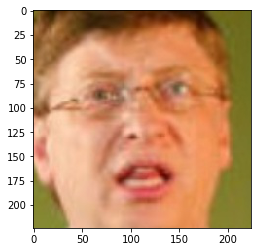

In [25]:
img=mpimg.imread('data/flw-resize/Bill_Gates_0001.jpg')
plt.imshow(img)

In [26]:
import numpy as np
import cv2
import time

def crop_faces(f_cascade, colored_img, scaleFactor = 1.1):
    img_copy = np.copy(colored_img)
    #convert the test image to gray image as opencv face detector expects gray images
    gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
    
    #let's detect multiscale (some images may be closer to camera than others) images
    faces = f_cascade.detectMultiScale(gray, scaleFactor=scaleFactor, minNeighbors=5);
    
    #go over list of faces and draw them as rectangles on original colored img
    if len(faces) == 1:
        (x, y, w, h) = faces[0]
        return img_copy[y:y+h, x:x+w]
    else:
        return []

In [ ]:
import glob
import json
import os
import cv2
idx = 0

haar_face_cascade = cv2.CascadeClassifier('data/haarcascade_frontalface_alt.xml')

for filename in glob.glob('data/flw-raw/*.jpg'):
    idx = idx + 1
    test_img = cv2.imread(filename)
    new_filename = filename.replace('flw-raw', 'flw-resize')
    
    if os.path.isfile(new_filename):
        print(new_filename, " Processed")
    else:
        faces_detected_img = crop_faces(haar_face_cascade, test_img)
    
        if len(faces_detected_img) > 0:
            print(new_filename)
            resize_detected = cv2.resize(faces_detected_img, (224,224))
            cv2.imwrite(new_filename, resize_detected)

data/flw-resize/Vincent_Sombrotto_0001.jpg  Processed
data/flw-resize/Ramon_Ponce_de_Leon_0001.jpg  Processed
data/flw-resize/Tom_Daschle_0014.jpg  Processed
data/flw-resize/Susan_Sarandon_0002.jpg  Processed
data/flw-resize/Alexandra_Rozovskaya_0001.jpg  Processed
data/flw-resize/Hans_Eichel_0002.jpg  Processed
data/flw-resize/Eric_Bana_0001.jpg  Processed
data/flw-resize/Michael_Schumacher_0016.jpg  Processed
data/flw-resize/Carrie-Anne_Moss_0004.jpg  Processed
data/flw-resize/Vincent_Brooks_0005.jpg  Processed
data/flw-resize/Alvaro_Uribe_0004.jpg  Processed
data/flw-resize/Martin_Verkerk_0002.jpg  Processed
data/flw-resize/George_W_Bush_0160.jpg  Processed
data/flw-resize/Dominik_Hrbaty_0001.jpg  Processed
data/flw-resize/Recep_Tayyip_Erdogan_0024.jpg  Processed
data/flw-resize/Tony_Blair_0039.jpg  Processed
data/flw-resize/Tung_Chee-hwa_0006.jpg  Processed
data/flw-resize/Arturo_Gatti_0003.jpg  Processed
data/flw-resize/Jon_Gruden_0007.jpg  Processed
data/flw-resize/Matt_Dillon_00

data/flw-resize/George_Clooney_0001.jpg  Processed
data/flw-resize/Jesse_Ventura_0001.jpg  Processed
data/flw-resize/Vojislav_Kostunica_0001.jpg  Processed
data/flw-resize/Nestor_Kirchner_0029.jpg  Processed
data/flw-resize/Michelle_Collins_0002.jpg  Processed
data/flw-resize/Bryan_Adams_0001.jpg  Processed
data/flw-resize/Tom_Ridge_0029.jpg  Processed
data/flw-resize/Hans_Blix_0002.jpg  Processed
data/flw-resize/Oliver_Phelps_0001.jpg  Processed
data/flw-resize/Junichiro_Koizumi_0050.jpg  Processed
data/flw-resize/Yashwant_Sinha_0003.jpg  Processed
data/flw-resize/John_Snow_0007.jpg  Processed
data/flw-resize/Clint_Eastwood_0003.jpg  Processed
data/flw-resize/Angela_Bassett_0005.jpg  Processed
data/flw-resize/Leisel_Jones_0001.jpg  Processed
data/flw-resize/Donald_Rumsfeld_0105.jpg  Processed
data/flw-resize/Jennifer_Rodriguez_0001.jpg  Processed
data/flw-resize/Lance_Bass_0003.jpg  Processed
data/flw-resize/Hillary_Clinton_0004.jpg  Processed
data/flw-resize/Mary_Steenburgen_0002.jpg

data/flw-resize/Rudolph_Giuliani_0001.jpg  Processed
data/flw-resize/Nasser_al-Kidwa_0001.jpg  Processed
data/flw-resize/Donald_Rumsfeld_0076.jpg  Processed
data/flw-resize/Gerhard_Schroeder_0025.jpg  Processed
data/flw-resize/Vladimir_Putin_0036.jpg  Processed
data/flw-resize/Alejandro_Toledo_0014.jpg  Processed
data/flw-resize/Jiang_Zemin_0018.jpg  Processed
data/flw-resize/Nestor_Kirchner_0001.jpg  Processed
data/flw-resize/Serena_Williams_0015.jpg  Processed
data/flw-resize/Naomi_Watts_0013.jpg  Processed
data/flw-resize/Bill_Graham_0003.jpg  Processed
data/flw-resize/Hugo_Chavez_0061.jpg  Processed
data/flw-resize/George_W_Bush_0496.jpg  Processed
data/flw-resize/Dick_Cheney_0009.jpg  Processed
data/flw-resize/Francis_Ricciardone_0001.jpg  Processed
data/flw-resize/Cathryn_Crawford_0001.jpg  Processed
data/flw-resize/Ricardo_Monasterio_0001.jpg  Processed
data/flw-resize/Dennis_Powell_0001.jpg  Processed
data/flw-resize/Jean_Chretien_0018.jpg  Processed
data/flw-resize/Jay_Leno_00

data/flw-resize/Peter_Arnett_0003.jpg  Processed
data/flw-resize/Jacques_Chirac_0040.jpg  Processed
data/flw-resize/Xanana_Gusmao_0001.jpg  Processed
data/flw-resize/Janet_Thorpe_0001.jpg  Processed
data/flw-resize/Serena_Williams_0046.jpg  Processed
data/flw-resize/Luis_Gonzalez_0001.jpg  Processed
data/flw-resize/Andy_Roddick_0006.jpg  Processed
data/flw-resize/Mary_Elizabeth_Mastrantonio_0001.jpg  Processed
data/flw-resize/Arminio_Fraga_0004.jpg  Processed
data/flw-resize/Jason_Lezak_0002.jpg  Processed
data/flw-resize/Ariel_Sharon_0063.jpg  Processed
data/flw-resize/Fernando_Gonzalez_0004.jpg  Processed
data/flw-resize/Dino_de_Laurentis_0001.jpg  Processed
data/flw-resize/Queen_Sofia_0001.jpg  Processed
data/flw-resize/Tom_Reilly_0002.jpg  Processed
data/flw-resize/George_W_Bush_0232.jpg  Processed
data/flw-resize/Omar_Sharif_0003.jpg  Processed
data/flw-resize/David_Spade_0002.jpg  Processed
data/flw-resize/David_Beckham_0013.jpg  Processed
data/flw-resize/Herb_Sendek_0003.jpg  Pr

data/flw-resize/George_W_Bush_0199.jpg  Processed
data/flw-resize/Dennis_Hastert_0006.jpg  Processed
data/flw-resize/Jan_Ullrich_0006.jpg  Processed
data/flw-resize/Shimon_Peres_0005.jpg  Processed
data/flw-resize/Olympia_Dukakis_0001.jpg  Processed
data/flw-resize/Fidel_Castro_0006.jpg  Processed
data/flw-resize/Donald_Rumsfeld_0046.jpg  Processed
data/flw-resize/Chita_Rivera_0001.jpg  Processed
data/flw-resize/Tim_Chapman_0002.jpg  Processed
data/flw-resize/Richard_Myers_0007.jpg  Processed
data/flw-resize/Alfonso_Portillo_0001.jpg  Processed
data/flw-resize/Zahir_Shah_0001.jpg  Processed
data/flw-resize/Cindy_Klassen_0001.jpg  Processed
data/flw-resize/Arnold_Schwarzenegger_0027.jpg  Processed
data/flw-resize/Angelina_Jolie_0005.jpg  Processed
data/flw-resize/Dolly_Parton_0002.jpg  Processed
data/flw-resize/Jeff_Van_Gundy_0001.jpg  Processed
data/flw-resize/Art_Lopez_0001.jpg  Processed
data/flw-resize/Al_Gore_0001.jpg  Processed
data/flw-resize/Patty_Schnyder_0002.jpg  Processed
da

data/flw-resize/Donald_Rumsfeld_0094.jpg  Processed
data/flw-resize/Trent_Lott_0003.jpg  Processed
data/flw-resize/James_Butts_0002.jpg  Processed
data/flw-resize/Pete_Sampras_0003.jpg  Processed
data/flw-resize/Mian_Khursheed_Mehmood_Kasuri_0004.jpg  Processed
data/flw-resize/Hugo_Chavez_0037.jpg  Processed
data/flw-resize/Anna_Kournikova_0008.jpg  Processed
data/flw-resize/Lee_Hoi-chang_0001.jpg  Processed
data/flw-resize/George_W_Bush_0107.jpg  Processed
data/flw-resize/Pat_Summitt_0001.jpg  Processed
data/flw-resize/Max_Mayfield_0001.jpg  Processed
data/flw-resize/Laura_Bush_0025.jpg  Processed
data/flw-resize/Princess_Hisako_0001.jpg  Processed
data/flw-resize/Raul_Castaneda_0001.jpg  Processed
data/flw-resize/Keanu_Reeves_0002.jpg  Processed
data/flw-resize/Joschka_Fischer_0011.jpg  Processed
data/flw-resize/Michael_Moore_0003.jpg  Processed
data/flw-resize/Denzel_Washington_0005.jpg  Processed
data/flw-resize/Mickey_Rooney_0001.jpg  Processed
data/flw-resize/Flor_Montulo_0002.jp

data/flw-resize/Kim_Cattrall_0001.jpg  Processed
data/flw-resize/Sara_Elisabeth_Ahmad_0001.jpg  Processed
data/flw-resize/Hitoshi_Oshitani_0001.jpg  Processed
data/flw-resize/Duane_Barber_0001.jpg  Processed
data/flw-resize/Gerry_Adams_0001.jpg  Processed
data/flw-resize/Roy_Chaderton_0001.jpg  Processed
data/flw-resize/Roger_Federer_0009.jpg  Processed
data/flw-resize/Sergio_Vieira_De_Mello_0008.jpg  Processed
data/flw-resize/Enola_Rice_0001.jpg  Processed
data/flw-resize/Jim_Tressel_0004.jpg  Processed
data/flw-resize/Vicente_Fox_0009.jpg  Processed
data/flw-resize/Khader_Rashid_Rahim_0001.jpg  Processed
data/flw-resize/Bill_Byrne_0001.jpg  Processed
data/flw-resize/Larry_Ellison_0003.jpg  Processed
data/flw-resize/John_Kerry_0013.jpg  Processed
data/flw-resize/James_Gandolfini_0003.jpg  Processed
data/flw-resize/Biljana_Plavsic_0001.jpg  Processed
data/flw-resize/Hunter_Kemper_0001.jpg  Processed
data/flw-resize/Raquel_Welch_0001.jpg  Processed
data/flw-resize/Jose_Maria_Aznar_0011.

data/flw-resize/Jackie_Chan_0003.jpg  Processed
data/flw-resize/Bernard_Law_0004.jpg  Processed
data/flw-resize/Jenna_Elfman_0001.jpg  Processed
data/flw-resize/Alejandro_Toledo_0019.jpg  Processed
data/flw-resize/Wei_Wu_0001.jpg  Processed
data/flw-resize/George_W_Bush_0414.jpg  Processed
data/flw-resize/Jiang_Zemin_0001.jpg  Processed
data/flw-resize/Ariel_Sharon_0016.jpg  Processed
data/flw-resize/Colin_Powell_0111.jpg  Processed
data/flw-resize/Francesco_Totti_0001.jpg  Processed
data/flw-resize/George_W_Bush_0433.jpg  Processed
data/flw-resize/Prince_Charles_0001.jpg  Processed
data/flw-resize/Eric_Daze_0001.jpg  Processed
data/flw-resize/Laura_Bush_0005.jpg  Processed
data/flw-resize/Bill_Callahan_0001.jpg  Processed
data/flw-resize/Stephan_Eberharter_0001.jpg  Processed
data/flw-resize/Atal_Bihari_Vajpayee_0021.jpg  Processed
data/flw-resize/Jon_Gruden_0001.jpg  Processed
data/flw-resize/Mohammed_Baqir_al-Hakim_0003.jpg  Processed
data/flw-resize/Pete_Carroll_0002.jpg  Processed

data/flw-resize/David_Beckham_0024.jpg  Processed
data/flw-resize/Michael_Lopez-Alegria_0001.jpg  Processed
data/flw-resize/Filip_De_Winter_0001.jpg  Processed
data/flw-resize/Pedro_Mahecha_0001.jpg  Processed
data/flw-resize/Fidel_Castro_0017.jpg  Processed
data/flw-resize/Brian_Griese_0002.jpg  Processed
data/flw-resize/John_Allen_Muhammad_0010.jpg  Processed
data/flw-resize/George_W_Bush_0530.jpg  Processed
data/flw-resize/Vicente_Fox_0004.jpg  Processed
data/flw-resize/Edwina_Currie_0001.jpg  Processed
data/flw-resize/Robert_Blake_0005.jpg  Processed
data/flw-resize/Ari_Fleischer_0005.jpg  Processed
data/flw-resize/Omar_Khan_Sharif_0001.jpg  Processed
data/flw-resize/Tariq_Aziz_0001.jpg  Processed
data/flw-resize/Tony_Fernandes_0001.jpg  Processed
data/flw-resize/Donald_Rumsfeld_0033.jpg  Processed
data/flw-resize/Geoff_Hoon_0005.jpg  Processed
data/flw-resize/John_Brady_0002.jpg  Processed
data/flw-resize/Jong_Wook_Lee_0004.jpg  Processed
data/flw-resize/Jack_Straw_0008.jpg  Proce

data/flw-resize/Tiger_Woods_0019.jpg  Processed
data/flw-resize/Gillian_Anderson_0001.jpg  Processed
data/flw-resize/Matt_Doherty_0003.jpg  Processed
data/flw-resize/Mark_Leno_0001.jpg  Processed
data/flw-resize/Lance_Armstrong_0018.jpg  Processed
data/flw-resize/Jeff_Dederian_0001.jpg  Processed
data/flw-resize/Oscar_De_La_Hoya_0007.jpg  Processed
data/flw-resize/Jim_Doyle_0001.jpg  Processed
data/flw-resize/Benazir_Bhutto_0004.jpg  Processed
data/flw-resize/Gloria_Macapagal_Arroyo_0019.jpg  Processed
data/flw-resize/Jean_Chretien_0029.jpg  Processed
data/flw-resize/Bob_Geldof_0002.jpg  Processed
data/flw-resize/Chuanyun_Li_0001.jpg  Processed
data/flw-resize/Julie_Gerberding_0015.jpg  Processed
data/flw-resize/Edward_Norton_0002.jpg  Processed
data/flw-resize/Manuel_Gehring_0001.jpg  Processed
data/flw-resize/Billy_Beane_0001.jpg  Processed
data/flw-resize/Gray_Davis_0024.jpg  Processed
data/flw-resize/Jack_Straw_0005.jpg  Processed
data/flw-resize/Tim_Henman_0016.jpg  Processed
data

data/flw-resize/Elva_Hsiao_0001.jpg  Processed
data/flw-resize/Joe_Lieberman_0007.jpg  Processed
data/flw-resize/Ashley_Olsen_0001.jpg  Processed
data/flw-resize/Vivica_Fox_0001.jpg  Processed
data/flw-resize/Kellie_Coffey_0001.jpg  Processed
data/flw-resize/Gracia_Burnham_0001.jpg  Processed
data/flw-resize/Mahmoud_Abbas_0025.jpg  Processed
data/flw-resize/Barbara_Felt-Miller_0001.jpg  Processed
data/flw-resize/Alvaro_Uribe_0011.jpg  Processed
data/flw-resize/Bryan_Chui_0001.jpg  Processed
data/flw-resize/Kaspar_Villiger_0001.jpg  Processed
data/flw-resize/Christopher_Walken_0001.jpg  Processed
data/flw-resize/Allison_Searing_0001.jpg  Processed
data/flw-resize/Barbara_De_Brun_0001.jpg  Processed
data/flw-resize/Alvaro_Uribe_0013.jpg  Processed
data/flw-resize/Don_King_0001.jpg  Processed
data/flw-resize/John_Rusnak_0001.jpg  Processed
data/flw-resize/Roh_Moo-hyun_0025.jpg  Processed
data/flw-resize/John_Rowland_0001.jpg  Processed
data/flw-resize/Robert_De_Niro_0004.jpg  Processed
da

data/flw-resize/Jeff_Hornacek_0001.jpg  Processed
data/flw-resize/Jennifer_Capriati_0042.jpg  Processed
data/flw-resize/George_W_Bush_0119.jpg  Processed
data/flw-resize/Bob_Newhart_0001.jpg  Processed
data/flw-resize/Vicente_Fox_0026.jpg  Processed
data/flw-resize/Li_Zhaoxing_0002.jpg  Processed
data/flw-resize/Debra_Brown_0001.jpg  Processed
data/flw-resize/Tiger_Woods_0021.jpg  Processed
data/flw-resize/Michael_Smith_Foster_0001.jpg  Processed
data/flw-resize/Naomi_Watts_0021.jpg  Processed
data/flw-resize/Bill_Gates_0007.jpg  Processed
data/flw-resize/Trevor_Watson_0001.jpg  Processed
data/flw-resize/Alfonso_Cuaron_0001.jpg  Processed
data/flw-resize/Colin_Powell_0131.jpg  Processed
data/flw-resize/Harrison_Ford_0012.jpg  Processed
data/flw-resize/Jeremy_Greenstock_0016.jpg  Processed
data/flw-resize/George_W_Bush_0166.jpg  Processed
data/flw-resize/Fernando_Velardez_0001.jpg  Processed
data/flw-resize/Mary_Steenburgen_0001.jpg  Processed
data/flw-resize/Caroline_Kennedy_0001.jpg  

data/flw-resize/Paul_Bremer_0012.jpg  Processed
data/flw-resize/Serena_Williams_0012.jpg  Processed
data/flw-resize/Serge_Tchuruk_0001.jpg  Processed
data/flw-resize/Donald_Rumsfeld_0118.jpg  Processed
data/flw-resize/Binyamin_Ben-Eliezer_0002.jpg  Processed
data/flw-resize/Roh_Moo-hyun_0011.jpg  Processed
data/flw-resize/Junichiro_Koizumi_0033.jpg  Processed
data/flw-resize/Lance_Bass_0001.jpg  Processed
data/flw-resize/Lleyton_Hewitt_0026.jpg  Processed
data/flw-resize/Angelica_Romero_0001.jpg  Processed
data/flw-resize/Hu_Jintao_0004.jpg  Processed
data/flw-resize/Penelope_Ann_Miller_0002.jpg  Processed
data/flw-resize/Timothy_McVeigh_0001.jpg  Processed
data/flw-resize/Christian_Olsson_0001.jpg  Processed
data/flw-resize/Recep_Tayyip_Erdogan_0009.jpg  Processed
data/flw-resize/Carmen_Electra_0003.jpg  Processed
data/flw-resize/Ari_Fleischer_0003.jpg  Processed
data/flw-resize/Cheryl_Tiegs_0001.jpg  Processed
data/flw-resize/Sachiko_Yamada_0001.jpg  Processed
data/flw-resize/Hun_Sen

data/flw-resize/Jennifer_Garner_0011.jpg  Processed
data/flw-resize/James_McMahon_0001.jpg  Processed
data/flw-resize/Gray_Davis_0010.jpg  Processed
data/flw-resize/Naji_Sabri_0008.jpg  Processed
data/flw-resize/Chris_Hernandez_0001.jpg  Processed
data/flw-resize/Ana_Palacio_0008.jpg  Processed
data/flw-resize/Gloria_Macapagal_Arroyo_0037.jpg  Processed
data/flw-resize/Ana_Sebastiao_0001.jpg  Processed
data/flw-resize/Donald_Rumsfeld_0054.jpg  Processed
data/flw-resize/Angela_Lansbury_0001.jpg  Processed
data/flw-resize/Scott_Weiland_0001.jpg  Processed
data/flw-resize/Hillary_Clinton_0011.jpg  Processed
data/flw-resize/James_Becker_0001.jpg  Processed
data/flw-resize/Peter_Struck_0003.jpg  Processed
data/flw-resize/Alejandro_Toledo_0035.jpg  Processed
data/flw-resize/Colin_Powell_0091.jpg  Processed
data/flw-resize/Valeri_Bure_0001.jpg  Processed
data/flw-resize/Jiang_Zemin_0014.jpg  Processed
data/flw-resize/Guillermo_Coria_0021.jpg  Processed
data/flw-resize/Samantha_Daniels_0001.jp

data/flw-resize/Tony_Clement_0001.jpg
data/flw-resize/Peter_Sejna_0001.jpg  Processed
data/flw-resize/Junichiro_Koizumi_0007.jpg  Processed
data/flw-resize/Don_Meredith_0001.jpg  Processed
data/flw-resize/Muhammad_Ali_0010.jpg  Processed
data/flw-resize/John_Negroponte_0026.jpg  Processed
data/flw-resize/Kirk_Johnson_0002.jpg  Processed
data/flw-resize/Doris_Roberts_0001.jpg  Processed
data/flw-resize/Danny_Morgan_0001.jpg  Processed
data/flw-resize/Megawati_Sukarnoputri_0017.jpg  Processed
data/flw-resize/Jean_Chretien_0042.jpg  Processed
data/flw-resize/Patricia_Medina_0001.jpg  Processed
data/flw-resize/Gary_Bald_0001.jpg  Processed
data/flw-resize/Peri_Gilpin_0001.jpg  Processed
data/flw-resize/Hugo_Chavez_0059.jpg  Processed
data/flw-resize/Alejandro_Toledo_0027.jpg  Processed
data/flw-resize/Vojislav_Kostunica_0002.jpg  Processed
data/flw-resize/Jose_Dirceu_0001.jpg  Processed
data/flw-resize/Jean-Pierre_Raffarin_0002.jpg  Processed
data/flw-resize/Fayssal_Mekdad_0003.jpg  Proces

data/flw-resize/Kathryn_Grayson_0001.jpg  Processed
data/flw-resize/Dorothy_Loudon_0001.jpg  Processed
data/flw-resize/Saeed_Anwar_0001.jpg  Processed
data/flw-resize/Leo_Mullin_0001.jpg  Processed
data/flw-resize/Bill_McBride_0003.jpg  Processed
data/flw-resize/David_Beckham_0004.jpg  Processed
data/flw-resize/Nanni_Moretti_0001.jpg  Processed
data/flw-resize/Naomi_Watts_0017.jpg  Processed
data/flw-resize/Russell_Coutts_0002.jpg  Processed
data/flw-resize/Alexandre_Despatie_0001.jpg  Processed
data/flw-resize/Herman_Edwards_0001.jpg  Processed
data/flw-resize/Eva_Marie_Saint_0001.jpg  Processed
data/flw-resize/Rubens_Barrichello_0010.jpg  Processed
data/flw-resize/Donald_Rumsfeld_0099.jpg  Processed
data/flw-resize/George_W_Bush_0056.jpg  Processed
data/flw-resize/Saddam_Hussein_0009.jpg  Processed
data/flw-resize/Debra_Shank_0001.jpg  Processed
data/flw-resize/George_W_Bush_0412.jpg  Processed
data/flw-resize/Megawati_Sukarnoputri_0016.jpg  Processed
data/flw-resize/Wen_Jiabao_0011.

data/flw-resize/Alastair_Campbell_0005.jpg  Processed
data/flw-resize/Miguel_Aldana_Ibarra_0001.jpg  Processed
data/flw-resize/Ricardo_Maduro_0002.jpg  Processed
data/flw-resize/James_Blake_0014.jpg  Processed
data/flw-resize/George_Gregan_0001.jpg  Processed
data/flw-resize/Hunter_Bates_0001.jpg  Processed
data/flw-resize/George_W_Bush_0484.jpg  Processed
data/flw-resize/Michael_Ballack_0001.jpg  Processed
data/flw-resize/Silvio_Berlusconi_0026.jpg  Processed
data/flw-resize/Justin_Leonard_0004.jpg  Processed
data/flw-resize/Tony_Blair_0041.jpg  Processed
data/flw-resize/Alan_Greenspan_0003.jpg  Processed
data/flw-resize/Gordon_Campbell_0001.jpg  Processed
data/flw-resize/Salman_Khan_0001.jpg  Processed
data/flw-resize/Celia_Cruz_0001.jpg  Processed
data/flw-resize/Patrick_Dennehy_0001.jpg  Processed
data/flw-resize/Paul_ONeill_0001.jpg  Processed
data/flw-resize/George_W_Bush_0363.jpg  Processed
data/flw-resize/Tiger_Woods_0001.jpg  Processed
data/flw-resize/Bernard_Landry_0001.jpg  

data/flw-resize/Ion_Tiriac_0001.jpg
data/flw-resize/Andrew_Cuomo_0002.jpg  Processed
data/flw-resize/Bill_Clinton_0017.jpg  Processed
data/flw-resize/Colin_Powell_0069.jpg  Processed
data/flw-resize/Donald_Rumsfeld_0081.jpg  Processed
data/flw-resize/Rita_Moreno_0001.jpg  Processed
data/flw-resize/Emmanuelle_Beart_0003.jpg  Processed
data/flw-resize/Serena_Williams_0021.jpg  Processed
data/flw-resize/Tubby_Smith_0003.jpg  Processed
data/flw-resize/Conan_OBrien_0002.jpg  Processed
data/flw-resize/Joan_Laporta_0003.jpg  Processed
data/flw-resize/Paul_Clark_0001.jpg  Processed
data/flw-resize/Emily_Robison_0001.jpg  Processed
data/flw-resize/Bertie_Ahern_0003.jpg  Processed
data/flw-resize/Jonathan_Woodgate_0001.jpg  Processed
data/flw-resize/Pierce_Brosnan_0005.jpg  Processed
data/flw-resize/Colin_Powell_0053.jpg  Processed
data/flw-resize/Michael_Richards_0001.jpg  Processed
data/flw-resize/Edward_Seaga_0001.jpg  Processed
data/flw-resize/Mitar_Rasevic_0001.jpg  Processed
data/flw-resiz

data/flw-resize/Jean-David_Levitte_0001.jpg  Processed
data/flw-resize/George_W_Bush_0492.jpg  Processed
data/flw-resize/Tommy_Franks_0006.jpg  Processed
data/flw-resize/Nick_Reilly_0001.jpg  Processed
data/flw-resize/Silvio_Berlusconi_0021.jpg  Processed
data/flw-resize/Tom_Ridge_0008.jpg  Processed
data/flw-resize/Hong_Myung_0001.jpg  Processed
data/flw-resize/Joseph_Biden_0002.jpg  Processed
data/flw-resize/George_W_Bush_0224.jpg  Processed
data/flw-resize/George_W_Bush_0314.jpg  Processed
data/flw-resize/Henry_Hilow_0001.jpg  Processed
data/flw-resize/Gus_Van_Sant_0001.jpg  Processed
data/flw-resize/Holly_Hunter_0002.jpg  Processed
data/flw-resize/Flor_Montulo_0001.jpg  Processed
data/flw-resize/Nizar_Trabelsi_0001.jpg  Processed
data/flw-resize/Tony_Blair_0012.jpg  Processed
data/flw-resize/Bob_Stoops_0006.jpg  Processed
data/flw-resize/Rolf_Zimmermann_0001.jpg  Processed
data/flw-resize/Steve_Lavin_0003.jpg  Processed
data/flw-resize/Dwayne_Johnson_0002.jpg  Processed
data/flw-re

data/flw-resize/Jean_Carnahan_0002.jpg  Processed
data/flw-resize/Sam_Bith_0003.jpg  Processed
data/flw-resize/John_Snow_0013.jpg  Processed
data/flw-resize/David_Beckham_0010.jpg  Processed
data/flw-resize/Jason_Statham_0001.jpg  Processed
data/flw-resize/Ben_Kingsley_0001.jpg  Processed
data/flw-resize/Catherine_Zeta-Jones_0009.jpg  Processed
data/flw-resize/Kim_Clijsters_0004.jpg  Processed
data/flw-resize/Luiz_Inacio_Lula_da_Silva_0022.jpg  Processed
data/flw-resize/Armando_Calderon_Sol_0001.jpg  Processed
data/flw-resize/Shane_Hmiel_0001.jpg  Processed
data/flw-resize/Cora_Cambell_0001.jpg  Processed
data/flw-resize/Anna_Chicherova_0001.jpg  Processed
data/flw-resize/Sandra_Shamas_0001.jpg  Processed
data/flw-resize/Kevin_Sorbo_0001.jpg  Processed
data/flw-resize/Ariel_Sharon_0076.jpg  Processed
data/flw-resize/Justin_Leonard_0003.jpg  Processed
data/flw-resize/Tom_Ridge_0005.jpg  Processed
data/flw-resize/Danielle_Spencer_0001.jpg  Processed
data/flw-resize/Paul_Brandt_0001.jpg  

data/flw-resize/Candie_Kung_0004.jpg  Processed
data/flw-resize/Lino_Oviedo_0003.jpg  Processed
data/flw-resize/Igor_Ivanov_0013.jpg  Processed
data/flw-resize/Silvio_Berlusconi_0010.jpg  Processed
data/flw-resize/Dick_Latessa_0001.jpg  Processed
data/flw-resize/Richard_Ward_0001.jpg  Processed
data/flw-resize/Tatjana_Gsell_0001.jpg  Processed
data/flw-resize/Arnold_Schwarzenegger_0028.jpg  Processed
data/flw-resize/Alex_Sink_0002.jpg  Processed
data/flw-resize/Hitomi_Soga_0003.jpg  Processed
data/flw-resize/Shireen_Amir_Begum_0001.jpg  Processed
data/flw-resize/George_W_Bush_0522.jpg  Processed
data/flw-resize/Paul_McCartney_0003.jpg  Processed
data/flw-resize/Colin_Powell_0123.jpg  Processed
data/flw-resize/Tony_Parker_0002.jpg  Processed
data/flw-resize/Michael_Shelby_0001.jpg  Processed
data/flw-resize/Ren_Qingjin_0001.jpg  Processed
data/flw-resize/Mariah_Carey_0005.jpg  Processed
data/flw-resize/Gordon_Brown_0005.jpg  Processed
data/flw-resize/Steve-O_0001.jpg  Processed
data/flw

data/flw-resize/Bill_Simon_0006.jpg  Processed
data/flw-resize/Denise_Locke_0001.jpg  Processed
data/flw-resize/Yu_Shyi-kun_0002.jpg  Processed
data/flw-resize/Britney_Spears_0002.jpg  Processed
data/flw-resize/Carlos_Menem_0005.jpg  Processed
data/flw-resize/Paul_Martin_0007.jpg  Processed
data/flw-resize/Queen_Elizabeth_II_0009.jpg  Processed
data/flw-resize/Alexandra_Stevenson_0001.jpg  Processed
data/flw-resize/Bill_Paxton_0002.jpg  Processed
data/flw-resize/John_Fenn_0001.jpg  Processed
data/flw-resize/Jean_Charest_0013.jpg  Processed
data/flw-resize/Jiri_Novak_0009.jpg  Processed
data/flw-resize/Mike_Helton_0001.jpg  Processed
data/flw-resize/Mahdi_Al_Bassam_0001.jpg  Processed
data/flw-resize/George_W_Bush_0460.jpg  Processed
data/flw-resize/Mariana_Pollack_0001.jpg  Processed
data/flw-resize/Richard_Levin_0001.jpg  Processed
data/flw-resize/Eddie_Lewis_0001.jpg  Processed
data/flw-resize/Jimmy_Carter_0004.jpg  Processed
data/flw-resize/Joseph_Deiss_0001.jpg  Processed
data/flw-

In [ ]:
img=mpimg.imread('data/flw-resize/Bill_Gates_0001.jpg')
plt.imshow(img)

In [ ]:
import glob
import json
import os

idx = 0
outer_idx = 0
val_file = open('listfile-val.lst', 'w')
train_file = open('listfile-train.lst', 'w')
write_train_file = True

file_count = len(glob.glob('data/flw-responses/*.json'))
train_fraction = 0.8

for filename in glob.glob('data/flw-responses/*.json'):
    outer_idx = outer_idx + 1
    data = json.load(open(filename))
    
    if outer_idx >= int(train_fraction*file_count):
        write_train_file = False
        
    filename = filename.split('/')[2]
    filename = filename.split('.')[0]
    fname = "data/flw-resize/{}.jpg".format(filename)
    
    if os.path.isfile(fname):
        idx = idx + 1
        smile = 0
        if data['Smile']['Value'] and data['Smile']['Confidence']> 0.75:
            smile = 1
            
        emotions = ['HAPPY','CALM','ANGRY','SAD','SURPRISED','CONFUSED','DISGUSTED']
        labels = [0, 0, 0, 0, 0, 0, 0]
        
        i=-1
        for emotion in emotions:
            i = i+1
            for data_emotion in data['Emotions']:
                if emotion == data_emotion['Type']: 
                    if data_emotion['Confidence'] > 0.75:
                        labels[i] = 1
        if write_train_file:
            train_file.write("{} \t {:-d} \t {:-d} \t {:-d} \t {:-d} \t {:-d} \t {:-d} \t {:-d} \t {:-d} \t {} \n".format(
                idx, smile, labels[0], labels[1], labels[2], labels[3], labels[4], labels[5], labels[6], fname))
        else:
            val_file.write("{} \t {:-d} \t {:-d} \t {:-d} \t {:-d} \t {:-d} \t {:-d} \t {:-d} \t {:-d} \t {} \n".format(
                idx, smile, labels[0], labels[1], labels[2], labels[3], labels[4], labels[5], labels[6], fname))    